In [17]:
import json
from urllib.request import urlopen
from pylab import *
import dateutil
%matplotlib inline


raw_url = 'http://localhost:5000/counters/{}/data/'
deseasonalized_url = 'http://localhost:5000/counters/{}/data/deseasonalized/'

counters_url = 'http://localhost:5000/counters/'

counters = [x['properties']['id'] for x in json.loads(urlopen(counters_url).read().decode('utf8'))['features']]


In [24]:
def plot_counter(i):
    url = raw_url.format(str(i))
    data = json.loads(urlopen(url).read().decode('utf8'))
    dates = [dateutil.parser.parse(x['datetime']) for x in data['data']]
    
    north = [x['bike_north'] for x in data['data']]
    south = [x['bike_south'] for x in data['data']]
    plot(dates, north)
    plot(dates, south)
    
    url = deseasonalized_url.format(str(i))
    data = json.loads(urlopen(url).read().decode('utf8'))
    result = [x[1] for x in data['data']]
    dates = [dateutil.parser.parse(x[0]) for x in data['data']]
    plot(dates,result)
    title(i)

    show()

HTTPError: HTTP Error 500: INTERNAL SERVER ERROR

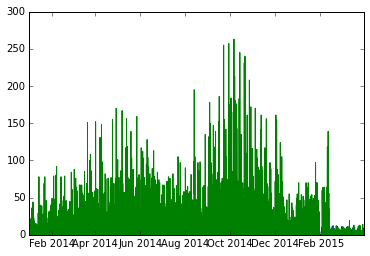

In [25]:
for i in counters:
    plot_counter(i)

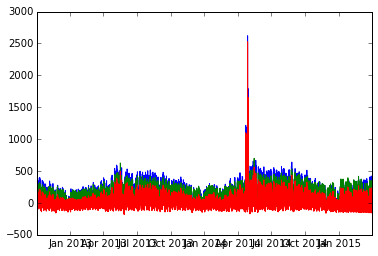

In [20]:
plot_counter(9)